In [ ]:
# Oğuzhan Çakar - 20558

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns  # a visualization library based on matplotlib
from datetime import datetime
from os.path import join

import warnings

warnings.filterwarnings('ignore')
d_path = "./"
filename = "taxi-trips.csv"

df = pd.read_csv(join(d_path, filename))

df.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695


In [3]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


In [4]:
# Average trip duration: Apprx. 15.5 Mins
# Average passenger count: 1.65
df.info() # Types of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118185 entries, 0 to 118184
Data columns (total 11 columns):
id                    118185 non-null object
vendor_id             118185 non-null int64
pickup_datetime       118185 non-null object
dropoff_datetime      118185 non-null object
passenger_count       118185 non-null int64
pickup_longitude      118185 non-null float64
pickup_latitude       118185 non-null float64
dropoff_longitude     118185 non-null float64
dropoff_latitude      118185 non-null float64
store_and_fwd_flag    118185 non-null object
trip_duration         118185 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 9.9+ MB


In [5]:
df.isnull().sum()  # no missing values

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [6]:
print("Number of vendor_ids in the dataset: ", len(df["vendor_id"]))
print("Number of unique vendor_ids in the dataset: ", len(pd.unique(df["vendor_id"])), "\n")

Number of vendor_ids in the dataset:  118185
Number of unique vendor_ids in the dataset:  2 



In [7]:
#There are 2 different vendors

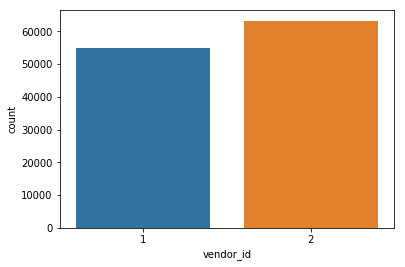

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# There are more samples with vendor_id=2 than vendor_id=1
sns.countplot(x="vendor_id", data=df)

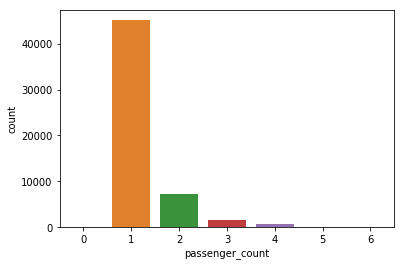

In [9]:
sns.countplot(x="passenger_count", data=df[df["vendor_id"] == 1])
#Distribution of the number of passengers where vendor_id = 1

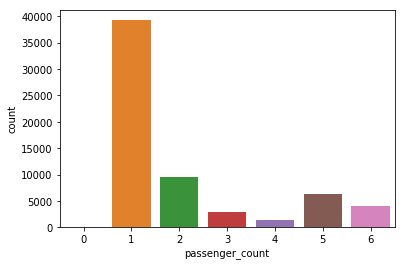

In [10]:
sns.countplot(x="passenger_count", data=df[df["vendor_id"] == 2])
# Distribution of the number of passengers where vendor_id = 2

In [11]:
#string to datetime conversion
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df["dropoff_datetime"] = pd.to_datetime(df["dropoff_datetime"])

In [12]:
df = df[df["trip_duration"] < 500000] # remove the samples with trip duration over 20 days

In [13]:
import reverse_geocoder as rg
#reverse geocoding for pickup districts
locs = df[['pickup_latitude' , 'pickup_longitude']].values
lat_lng = []

for i in locs:
	lat_lng.append(tuple(i))

res = rg.search(lat_lng)

adr = []

for i in res:
	adr.append(i["admin2"])

df['pickup_district'] = adr

Loading formatted geocoded file...


In [14]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,New York County
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Queens County
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Hudson County
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,New York County
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,


In [15]:
#reverse geocoding for dropoff districts
locs = df[['dropoff_latitude' , 'dropoff_longitude']].values
lat_lng = []

for i in locs:
	lat_lng.append(tuple(i))

result = rg.search(lat_lng)

adr = []

for i in result:
	adr.append(i["admin2"])

df['dropoff_district'] = adr
df.dropna(inplace=True)

In [16]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,New York County,New York County
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Queens County,New York County
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Hudson County,New York County
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,New York County,Queens County
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,,


In [17]:
df_top_pick_up = df.groupby(['pickup_district'])['id'].agg(
    {"count": len}).sort_values(
    "count", ascending=False).head(6).reset_index()

In [18]:
df_top_pick_up # top 5 districts where passengers prefer to leave

,pickup_district,count
0,New York County,45470
1,,34625
2,Queens County,18415
3,Hudson County,13533
4,Bronx,2782
5,Nassau County,1903


In [19]:
df_top_pick_up.drop([1],axis=0) # remove the missing value at index 1

,pickup_district,count
0,New York County,45470
2,Queens County,18415
3,Hudson County,13533
4,Bronx,2782
5,Nassau County,1903


In [20]:
df_top_drop_off = df.groupby(['dropoff_district'])['id'].agg(
    {"count": len}).sort_values(
    "count", ascending=False).head(6).reset_index()

In [21]:
df_top_drop_off.drop([1],axis=0) # top 5 drop off districts

,dropoff_district,count
0,New York County,45484
2,Queens County,20933
3,Hudson County,13230
4,Kings County,2808
5,Bronx,1730


In [22]:
locs_pick = df[['pickup_latitude' , 'pickup_longitude']].values
locs_drop = df[['dropoff_latitude' , 'dropoff_longitude']].values
tuple_list1 = []
tuple_list2 = []

for i in locs_pick:
    tuple_list1.append(tuple(i))
    
for i in locs_drop:
    tuple_list2.append(tuple(i))

In [23]:
 from geopy.distance import geodesic

In [24]:
newlist = []
for i in range(len(tuple_list1)):
    distance = geodesic(tuple_list1[i],tuple_list2[i]).km
    newlist.append(distance)

In [25]:
df['distance'] = newlist

In [26]:
df.head() # distances are added as km

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,New York County,New York County,1.502172
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Queens County,New York County,5.114807
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Hudson County,New York County,1.495018
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,New York County,Queens County,1.976279
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,,,2.513961


In [27]:
def time_of_day(hour):
    if hour >= 7 and hour < 9:
        return 'rush_hour_morning'
    elif hour >= 9 and hour < 16:
        return 'afternoon'
    elif hour >= 16 and hour < 18:
        return 'rush_hour_evening'
    elif hour >= 18 and hour < 23:
        return 'evening'
    else:
        return 'late_night'

In [28]:
times = df['pickup_datetime'].dt.hour

In [29]:
df['time_of_day'] = times.apply(time_of_day)

In [30]:
df.head() # time_of_day column is added

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,New York County,New York County,1.502172,rush_hour_evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Queens County,New York County,5.114807,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Hudson County,New York County,1.495018,rush_hour_morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,New York County,Queens County,1.976279,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,,,2.513961,afternoon


In [31]:
means_dist = df.groupby('time_of_day')['distance'].mean()

In [32]:
means_dist = means_dist.reindex(['rush_hour_morning','afternoon','rush_hour_evening','evening','late_night'])
means_dist # avr distance according to the time of the day is 3-4km

time_of_day
rush_hour_morning    3.128280
afternoon            3.109986
rush_hour_evening    3.342814
evening              3.378136
late_night           4.117635
Name: distance, dtype: float64

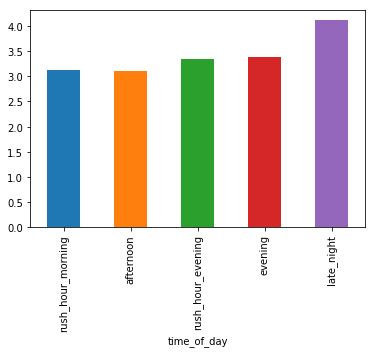

In [33]:
means_dist.plot(kind='bar')
#as the time of the day goes late , average distance increases

In [34]:
means_dur = df.groupby('time_of_day')['trip_duration'].mean()

In [35]:
means_dur = means_dur.reindex(['rush_hour_morning','afternoon','rush_hour_evening','evening','late_night'])
means_dur # avr trip duration according to the time of the day is 15-16mins

time_of_day
rush_hour_morning     918.488716
afternoon             963.922746
rush_hour_evening    1024.494552
evening               893.595329
late_night            866.095457
Name: trip_duration, dtype: float64

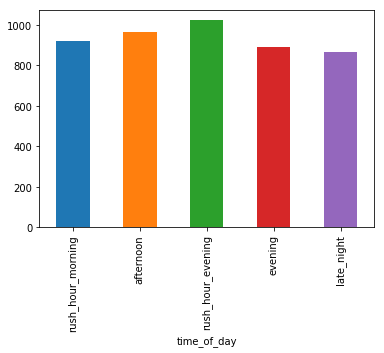

In [36]:
means_dur.plot(kind='bar')
# average trip duration increases as time of the day
# goes from morning to rush_hour_evening and, 
# it decreases as it goes from rush_hour_evening to late_night

In [38]:
# distances of the trips with 1 passenger
one_passenger = df.loc[df['passenger_count'] == 1]['distance']
# distances of the trips with 2 or more passenger
more_passenger= df.loc[df['passenger_count'] > 1]['distance']

In [39]:
print("mean distance of trips with 1 passenger: {:.2f}".format(one_passenger.mean()))

mean distance of trips with 1 passenger: 3.36


In [40]:
print("mean distance of trips with 2 or more passengers: {:.2f}".format(more_passenger.mean()))

mean distance of trips with 2 or more passengers: 3.49


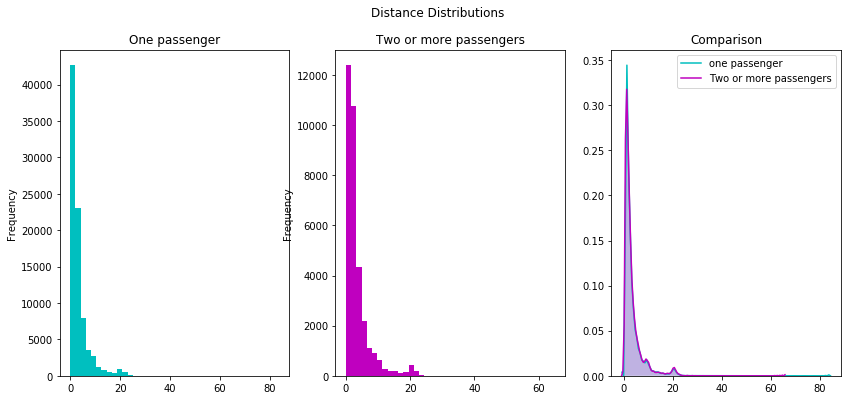

In [41]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))
one_passenger.plot(kind="hist", ax=ax[0], bins=40, label="one passenger", color="c")
ax[0].set_title("One passenger")

more_passenger.plot(kind="hist", ax=ax[1], bins=40, label="Two or more passengers", color="m")
ax[1].set_title("Two or more passengers")

sns.kdeplot(one_passenger, shade=True, label="one passenger", ax=ax[2], color="c")
sns.kdeplot(more_passenger, shade=True, label="Two or more passengers", ax=ax[2], color="m")
ax[2].set_title("Comparison")

plt.suptitle("Distance Distributions")
plt.show()

In [42]:
stats.ttest_ind(one_passenger, more_passenger, equal_var=False)

Ttest_indResult(statistic=-4.90336211049223, pvalue=9.445117080445828e-07)

In [ ]:
# If we set te significance level as 0.05,
# since the p value we get is much less than 0.05,
# we reach the conclusion as 'passenger group size has no effect on the distance'